In [1]:
import numpy as np
import aocd
import re

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from PIL import Image 
%matplotlib inline

def get_as_ints(l):
    return list(map(lambda x: int(x), l))

def get_lines(day):
    return aocd.get_data(year=2021, day=day).split("\n")

def get_csv(day):
    return aocd.get_data(year=2021, day=day).split(",")
                
def get_lines_as_ints(day):
    return get_as_ints(get_lines(day))

def get_csv_as_ints(day):
    return get_as_ints(get_csv(day))

def get_csv_lines(day):
    return list(map(lambda s: s.split(","), get_as_lines(day)))

def get_csv_lines_as_ints(day):
    return list(map(lambda s: get_as_ints(s.split(",")), get_as_lines(day)))

In [2]:
# Day 1: part 1

data = get_lines_as_ints(1)

larger = 0
for i in range(len(data) - 1):
    if data[i] < data[i + 1]:
        larger += 1
        
print(larger)

1521


In [3]:
# Day 1: part 2

data = get_lines_as_ints(1)

larger = 0
for i in range(len(data) - 3):
    if data[i] < data[i + 3]:
        larger += 1
        
print(larger)

1543


In [4]:
# Day 2: part 1

data = get_lines(2)

depth = 0
forward = 0

for datum in data:
    instruction = datum.split(" ")
    val = int(instruction[1])
    if instruction[0] == "forward":
        forward += val
    elif instruction[0] == "up":
        depth -= val
    else:
        depth += val

print(forward * depth)

1654760


In [5]:
# Day 2: part 2

data = get_lines(2)

depth = 0
forward = 0
aim = 0

for datum in data:
    instruction = datum.split(" ")
    val = int(instruction[1])
    if instruction[0] == "forward":
        forward += val
        depth += aim * val
    elif instruction[0] == "up":
        aim -= val
    else:
        aim += val

print(forward * depth)

1956047400


In [6]:
# Day 3: part 1

data = get_lines(3)

new_data = np.zeros((len(data), len(data[0])))

counter = 0
for datum in data:
    for bit in datum:
        new_data[counter // len(data[0])][counter % len(data[0])] += int(bit)
        counter += 1

one_is_max = np.sum(new_data, axis = 0) > (len(new_data) / 2)

num_one = 0
num_two = 0

for i in range(len(data[0])):
    num_one += pow(2, i) * one_is_max[len(data[0]) - i - 1]
    num_two += pow(2, i) * (1 - one_is_max[len(data[0]) - i - 1])
    
print(int(num_one * num_two))

2954600


In [7]:
# Day 3: part 2

data = get_lines(3)

new_data = np.zeros((len(data), len(data[0])))

counter = 0
for datum in data:
    for bit in datum:
        new_data[counter // len(data[0])][counter % len(data[0])] += int(bit)
        counter += 1

        
oxygen = np.copy(new_data)
co2 = np.copy(new_data)
index = 0
while len(oxygen) > 1 and index < len(data[0]):
    one_is_max = np.sum(oxygen, axis = 0)[index] >= (len(oxygen) / 2)
    oxygen = oxygen[oxygen[:, index] == (1 if one_is_max else 0)]
    index += 1

index = 0
while len(co2) > 1 and index < len(data[0]):
    one_is_max = np.sum(co2, axis = 0)[index] >= (len(co2) / 2)
    co2 = co2[co2[:, index] == (0 if one_is_max else 1)]
    index += 1

num_one = 0
num_two = 0

for i in range(len(data[0])):
    num_one += pow(2, i) * oxygen[0][len(data[0]) - i - 1]
    num_two += pow(2, i) * (co2[0][len(data[0]) - i - 1])
    
print(int(num_one * num_two))

1662846


In [8]:
# Day 4: Part 1

data = get_lines(4)
numbers = data[0].split(",")

boards = np.zeros(((len(data) - 1) // 6, 5, 5))
selected = np.copy(boards)

for i in range(2, len(data)):
    if len(data[i]) < 10:
        continue
    else:
        j = 0
        for num in re.split("\\s+", data[i].strip()):
            boards[(i - 2) // 6, (i - 2) % 6, j] = int(num)
            j+=1
            
for number in numbers:
    number = int(number)
    selected[boards[:,:,:] == number] = 1
    
    rows = np.logical_or.reduce(np.sum(selected, 2)[:, :] == 5, axis = 1)
    cols = np.logical_or.reduce(np.sum(selected, 1)[:, :] == 5, axis = 1)
    
    row = np.logical_or.reduce(rows)
    col = np.logical_or.reduce(cols)
    
    if row:
        print(int(np.sum(boards[rows][selected[rows] == False]) * number))
        break
    if col:
        print(int(np.sum(boards[cols][selected[cols] == False]) * number))
        break

49860


In [9]:
# Day 4: Part 2

data = get_lines(4)
numbers = data[0].split(",")

boards = np.zeros(((len(data) - 1) // 6, 5, 5))
selected = np.copy(boards)

for i in range(2, len(data)):
    if len(data[i]) < 10:
        continue
    else:
        j = 0
        for num in re.split("\\s+", data[i].strip()):
            boards[(i - 2) // 6, (i - 2) % 6, j] = int(num)
            j+=1

found = False
index = -1
for number in numbers:
    number = int(number)
    selected[boards[:,:,:] == number] = 1
    
    rows = np.logical_or.reduce(np.sum(selected, 2)[:, :] == 5, axis = 1)
    cols = np.logical_or.reduce(np.sum(selected, 1)[:, :] == 5, axis = 1)
    
    solved = np.logical_or(rows, cols)
    
    if len(solved[solved == False]) == 1:
        found = True
        index = solved == False
        
    if found and len(solved[solved == False]) == 0:
        print(int(np.sum(boards[index][selected[index] == 0]) * number))
        break

24628


In [10]:
# Day 5: Part 1

data = get_lines(5)

new_data = np.zeros((len(data), 2, 2))

for i in range(len(data)):
    d = data[i].split(" -> ")
    d = list(map(lambda x: x.split(","), d))
    new_data[i] = [[int(d[0][0]), int(d[0][1])], [int(d[1][0]), int(d[1][1])]]
    
grid = np.zeros((1000,1000))

for line in new_data:
    if line[0][0] == line[1][0]:
        start = int(min(line[0][1], line[1][1]))
        end = int(max(line[0][1], line[1][1]))
        for j in range(start, end + 1): 
            grid[int(line[0][0]), int(j)] += 1
            
    elif line[0][1] == line[1][1]:
        start = int(min(line[0][0], line[1][0]))
        end = int(max(line[0][0], line[1][0]))
        for j in range(start, end + 1): 
            grid[int(j), int(line[0][1])] += 1
            
print(len(grid[grid >= 2]))

7297


In [11]:
# Day 5: Part 2

data = get_lines(5)

new_data = np.zeros((len(data), 2, 2))

for i in range(len(data)):
    d = data[i].split(" -> ")
    d = list(map(lambda x: x.split(","), d))
    new_data[i] = [[int(d[0][0]), int(d[0][1])], [int(d[1][0]), int(d[1][1])]]
    
grid = np.zeros((1000,1000))

for line in new_data:
    if line[0][0] == line[1][0]:
        start = int(min(line[0][1], line[1][1]))
        end = int(max(line[0][1], line[1][1]))
        for j in range(start, end + 1): 
            grid[int(line[0][0]), int(j)] += 1
        continue
            
    elif line[0][1] == line[1][1]:
        start = int(min(line[0][0], line[1][0]))
        end = int(max(line[0][0], line[1][0]))
        for j in range(start, end + 1): 
            grid[int(j), int(line[0][1])] += 1
        continue

    delta = line[0] - line[1]
    
    if delta[0] == 0 or delta[1] == 0:
        continue
    
    x_range = range(int(delta[0]) + 1) if delta[0] > 0 else range(0, int(delta[0] - 1), -1)
    y_range = range(int(delta[1]) + 1) if delta[1] > 0 else range(0, int(delta[1] - 1), -1)
    
    for x,y in zip(x_range, y_range):
        grid[int(line[1][0] + x), int(line[1][1] + y)] +=1

print(len(grid[grid >= 2]))

21038


In [12]:
# Day 6: part 1

data = get_csv_as_ints(6)

for i in range(80):
    count = 0
    for j in range(len(data)):
        if data[j] != 0:
            data[j] -= 1
        else:
            count += 1
            data[j] = 6
    for new in range(count):
        data.append(8)

print(len(data))

351188


In [13]:
# Day 6: part 2

data = get_csv_as_ints(6)

bins = np.zeros((9))
for day in data:
    bins[day] +=1
    
for i in range(256):
    zeros = bins[0]
    bins = np.roll(bins, -1)
    bins[6] += zeros

print(int(bins.sum()))

1595779846729


In [14]:
# Day 7: part 1

data = np.array(get_csv_as_ints(7))

print(np.frompyfunc(lambda i: np.frompyfunc(lambda x: abs(x - i), 1, 1)(data).sum(), 1, 1)(np.arange(data.min(), data.max() + 1)).min())

336701


In [15]:
# Day 7: part 2

data = np.array(get_csv_as_ints(7))

def sum_fact(val):
    val = abs(val)
    return val * (val + 1) // 2

print(np.frompyfunc(lambda i: np.frompyfunc(lambda x: sum_fact(x-i), 1, 1)(data).sum(), 1, 1)(np.arange(data.min(), data.max() + 1)).min())

95167302


In [16]:
# Day 8: part 1

data = np.array(get_lines(8))
data = np.array(list(map(lambda s: np.array(s.split(" | ")[1].split(" ")), data)))

one = ['c', 'f']
four = ['b', 'c', 'd', 'f']
seven = ['a','c','f']
eight = ['a','b','c','d','e','f','g']

nums = [one, four, seven, eight]

counter = 0
for d in data:
    for d2 in d:
        length = len(d2)
        if length == 2 or length == 3 or length == 4 or length == 7:
            counter += 1
print(counter)
                    

449


In [17]:
from itertools import permutations

data = np.array(get_lines(8))
data = list(map(lambda s: list(map(lambda n: n.split(" "), s.split(" | "))), data))

total = 0
for d in data:
    output = 0
    
    vals = ["","","","","","","","","",""]
    
    
    for d1 in d[0]:
        length = len(d1)
        if length == 2:
            vals[1] = d1
        elif length == 3: 
            vals[7] = d1
        elif length == 4:
            vals[4] = d1
        elif length == 7:
            vals[8] = d1
    
    for d1 in d[0]:
        if d1 in vals:
            continue
        
        length = len(d1)
        if length == 5:
            if vals[1][0] in d1 and vals[1][1] in d1:
                vals[3] = d1
            else:
                common = 0
                for c in vals[4]:
                    if c in d1:
                        common += 1
                
                if common == 2:
                    vals[2] = d1
                else:
                    vals[5] = d1
        elif length == 6:
            common = 0
            for c in vals[1]:
                if c in d1:
                    common += 1
            
            if common == 1:
                vals[6] = d1
            else:
                common = 0
                for c in vals[4]:
                    if c in d1:
                        common += 1
                if common == 4:
                    vals[9] = d1
                else:
                    vals[0] = d1
    
    for d2 in d[1]:
        output *= 10
        perms = [''.join(p) for p in set(permutations(d2))]
        for perm in perms:
            if perm in vals:
                output += vals.index(perm)
                
    total += output
    
print(total)

968175


In [18]:
# Day 9: Part 1

data = np.array(get_lines(9))

total = 0
for i in range(len(data)):
    for j in range(len(data[i])):
        val = int(data[i][j])
        bad = False
        if not i - 1 == -1:
            if int(data[i - 1][j]) <= val:
                bad = True
        if not i + 1 == len(data):
            if int(data[i + 1][j]) <= val:
                bad = True
        if not j - 1 == -1:
            if int(data[i][j - 1]) <= val:
                bad = True
        if not j + 1 == len(data[i]):
            if int(data[i][j + 1]) <= val:
                bad = True
        if not bad:
            total += val + 1

print(total)

603


In [19]:
# Day 9: Part 2

data = np.array(get_lines(9))

low_points = []
for i in range(len(data)):
    for j in range(len(data[i])):
        val = int(data[i][j])
        bad = False
        if not i - 1 == -1:
            if int(data[i - 1][j]) <= val:
                bad = True
        if not i + 1 == len(data):
            if int(data[i + 1][j]) <= val:
                bad = True
        if not j - 1 == -1:
            if int(data[i][j - 1]) <= val:
                bad = True
        if not j + 1 == len(data[i]):
            if int(data[i][j + 1]) <= val:
                bad = True
        if not bad:
            low_points.append([i,j])
            
basin_sizes = []
def search_basin(cur, past, visited):
    if cur in visited:
        return
    
    if int(data[cur[0]][cur[1]]) > int(data[past[0]][past[1]]):
        if not int(data[cur[0]][cur[1]]) == 9:
            visited.append(cur)
        else:
            return
    else:
        return
    
    if cur[0] > 0:
        search_basin([cur[0] - 1, cur[1]], cur, visited)
    if cur[0] < len(data) - 1:
        search_basin([cur[0] + 1, cur[1]], cur, visited)
    if cur[1] > 0:
        search_basin([cur[0], cur[1] - 1], cur, visited)
    if cur[1] < len(data[cur[0]]) - 1:
        search_basin([cur[0], cur[1]  + 1], cur, visited)
    
for low_point in low_points:
    visited = []
    if low_point[0] > 0:
        search_basin([low_point[0] - 1, low_point[1]], low_point, visited)
        
    if low_point[0] < len(data) - 1:
        search_basin([low_point[0] + 1, low_point[1]], low_point, visited)
        
    if low_point[1] > 0:
        search_basin([low_point[0], low_point[1] - 1], low_point, visited)
        
    if low_point[1] < len(data[low_point[0]]) - 1:
        search_basin([low_point[0], low_point[1] + 1], low_point, visited)
        
    basin_sizes.append(len(visited) + 1)
    
print(np.multiply.reduce(np.array(basin_sizes)[np.array(basin_sizes).argsort()[-3::]]))

786780


In [20]:
# Day 10: Part 1
data = get_lines(10)

new_lines = []
for line in data:
    past_line = ""
    while line != past_line:
        past_line = line
        line = line.replace("()", "")
        line = line.replace("<>", "")
        line = line.replace("{}", "")
        line = line.replace("[]", "")
    
    if ")" in line or "]" in line or "}" in line or ">" in line:
        new_lines.append(line)
        
total = 0
for line in new_lines:
    found = False
    for c in line:
        if found:
            continue
        
        if c == ")":
            total += 3
            found = True
        elif c == "]":
            total += 57
            found = True
        elif c == "}":
            total += 1197
            found = True
        elif c == ">":
            total += 25137
            found = True
        
print(total)

362271


In [21]:
# Day 10: Part 2
data = get_lines(10)

new_lines = []
for line in data:
    past_line = ""
    while line != past_line:
        past_line = line
        line = line.replace("()", "")
        line = line.replace("<>", "")
        line = line.replace("{}", "")
        line = line.replace("[]", "")
    
    if not (")" in line or "]" in line or "}" in line or ">" in line):
        new_lines.append(line)
        
totals = []
for line in new_lines:
    total = 0
    for c in line[::-1]:
        total *= 5
        if c == "(":
            total += 1
        elif c == "[":
            total += 2
        elif c == "{":
            total += 3
        elif c == "<":
            total += 4
    totals.append(total)
        
totals = np.array(totals)
args = np.argsort(totals)
print(totals[args][(len(totals) // 2)])

1698395182


In [22]:
# Day 11: Part 1
data = get_lines(11)

new_data = np.zeros((10,10))

index = 0
for line in data:
    for n in line:
        new_data[index // 10][index % 10] = int(n)
        index += 1

def flash(x, y, flashed):
    if new_data[x, y] > 9 and flashed[x, y] == 0:
        sub_flashes = 1
        flashed[x, y] = 1
        
        for i in range(-1, 2):
            for j in range(-1, 2):
                if not i == 0 or not j == 0:
                    if not(x + i < 0 or y + j < 0 or x + i == 10 or y + j == 10):
                        new_data[x + i,y + j] += 1
                        sub_flashes += flash(x + i, y + j, flashed)

        return sub_flashes
    else:
        return 0

flashes = 0
for i in range(100):
    flashed = np.zeros((10, 10))
    for x in range(10):
       for y in range(10):
           new_data[x, y] += 1
    
    for x in range(10):
        for y in range(10):
            flashes += flash(x, y, flashed)
    new_data[new_data > 9] = 0
print(flashes)

1723


In [23]:
# Day 11: Part 2
data = get_lines(11)

new_data = np.zeros((10,10))

index = 0
for line in data:
    for n in line:
        new_data[index // 10][index % 10] = int(n)
        index += 1

def flash(x, y, flashed):
    if new_data[x, y] > 9 and flashed[x, y] == 0:
        flashed[x, y] = 1
        
        for i in range(-1, 2):
            for j in range(-1, 2):
                if not i == 0 or not j == 0:
                    if not(x + i < 0 or y + j < 0 or x + i == 10 or y + j == 10):
                        new_data[x + i,y + j] += 1
                        flash(x + i, y + j, flashed)
                        
i = 0
while True:
    flashed = np.zeros((10, 10))
    for x in range(10):
       for y in range(10):
           new_data[x, y] += 1
    
    for x in range(10):
        for y in range(10):
           flash(x, y, flashed)
    new_data[new_data > 9] = 0
    
    i += 1
    if new_data.sum() == 0:
        print(i)
        break

327


In [24]:
# Day 12: Part 1
data = get_lines(12)

data = """start-A
start-b
A-c
A-b
b-d
A-end
b-end""".split("\n")

data = list(map(lambda s: s.split("-"), data))

caves = []
isLarge = []

for pair in data:
    for cave in pair:
        if not cave in caves:
            caves.append(cave)
            isLarge.append(cave.lower() != cave)

caves = np.array(caves)            
            
pairs = np.zeros((len(caves), len(caves)))

for pair in data:
    pairs[caves == pair[0], caves == pair[1]] += 1
    pairs[caves == pair[1], caves == pair[0]] += 1
    
    
start = np.where(caves == "start")[0][0]
end = np.where(caves == "end")[0][0]

def search(index, visited):
    if (not len(visited) == 0) and caves[index] == "start":
        return 0
    
    if not isLarge[index] and index in visited:
        return 0
    
    if caves[index] == "end":
        return 1
    
    total = 0
    
    visited.append(index)
    for i in range(len(pairs[index])):
        if pairs[index][i] == 1:
            total += search(i, visited)
    visited.pop()
    return total
    
print(search(start, []))

10


In [25]:
# Day 12: Part 1
data = get_lines(12)

data = list(map(lambda s: s.split("-"), data))

caves = []
isLarge = []

for pair in data:
    for cave in pair:
        if not cave in caves:
            caves.append(cave)
            isLarge.append(cave.lower() != cave)

caves = np.array(caves)            
            
pairs = np.zeros((len(caves), len(caves)))

for pair in data:
    pairs[caves == pair[0], caves == pair[1]] += 1
    pairs[caves == pair[1], caves == pair[0]] += 1
    
    
start = np.where(caves == "start")[0][0]
end = np.where(caves == "end")[0][0]

def hasSmallTwice(visited):
    total = np.zeros(len(caves))
    for i in range(len(caves)):
        if not isLarge[i]:
            for j in visited:
                if j == i:
                    total[i] += 1
                    if total[i] == 2:
                        return True
    return False

def search(index, visited):
    if (not len(visited) == 0) and caves[index] == "start":
        return 0
    
    if not isLarge[index] and index in visited and hasSmallTwice(visited):
        return 0
    
    if caves[index] == "end":
        return 1
    
    total = 0
    
    visited.append(index)
    for i in range(len(pairs[index])):
        if pairs[index][i] == 1:
            total += search(i, visited)
    visited.pop()
    return total
    
print(search(start, []))

96988


In [26]:
# Day 13: Part 1

data = get_lines(13)

split = data.index("")

grid = np.zeros((split, 2))

for i in range(split):
    p = get_as_ints(data[i].split(","))
    grid[i] = [p[0], p[1]]
    
folds = np.zeros((len(data) - 1 - split))
j = 0

for i in range(split + 1, len(data)):
    if "x" in data[i]:
        folds[j] = 1
    j += 1
    
new_grid = []
    
size = 1310

for i in grid:
    if folds[0] and i[0] >= size // 2:
        i[0] = size - i[0]
    elif not folds[0] and i[1] >= size // 2:
        i[1] = size - i[1]
    
    if not (str(i[0]) + "," + str(i[1])) in new_grid:
        new_grid.append(str(i[0]) + "," + str(i[1]))

print(len(new_grid))
        

675


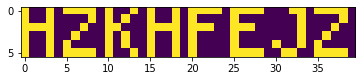

In [27]:
# Day 13: Part 2

data = get_lines(13)

split = data.index("")

grid = []

for i in range(split):
    p = get_as_ints(data[i].split(","))
    grid.append([p[0], p[1]])
    
folds = []

for i in range(split + 1, len(data)):
    folds.append("x" in data[i])
   
grid_size = [1311, 895]

for foldX in folds:
    size = grid_size[0] if foldX else grid_size[1]

    if foldX:
        grid_size[0] //= 2
    else:
        grid_size[1] //= 2
    
    new_grid = []
    for i in grid:
        if foldX and i[0] >= size // 2:
            i[0] = size - 1 - i[0]
        elif not foldX and i[1] >= size // 2:
            i[1] = size - 1 - i[1]
                
        if not i in new_grid:
            new_grid.append(i)

    grid = new_grid

display = np.zeros((6, 40))
for p in grid:
    display[p[1], p[0]] = 1

plt.imshow(display, vmin = 0, vmax = 1)
        